<div style="background-color:#e6f0ff; padding: 14px; border-left: 6px solid #3366cc; border-radius: 4px; font-family: Arial, sans-serif;">
  <h3 style="margin: 0; color: #2c3e50;">📈 Linear Regression</h3>
</div>

####
#### Importing necessary libraries and Importing CSV Data
####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AmesHousing.csv')

In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
len1 = df.shape
print("number of records={}".format(len1[0]))

number of records=2930


####
#### Find the Missing Values
####

['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


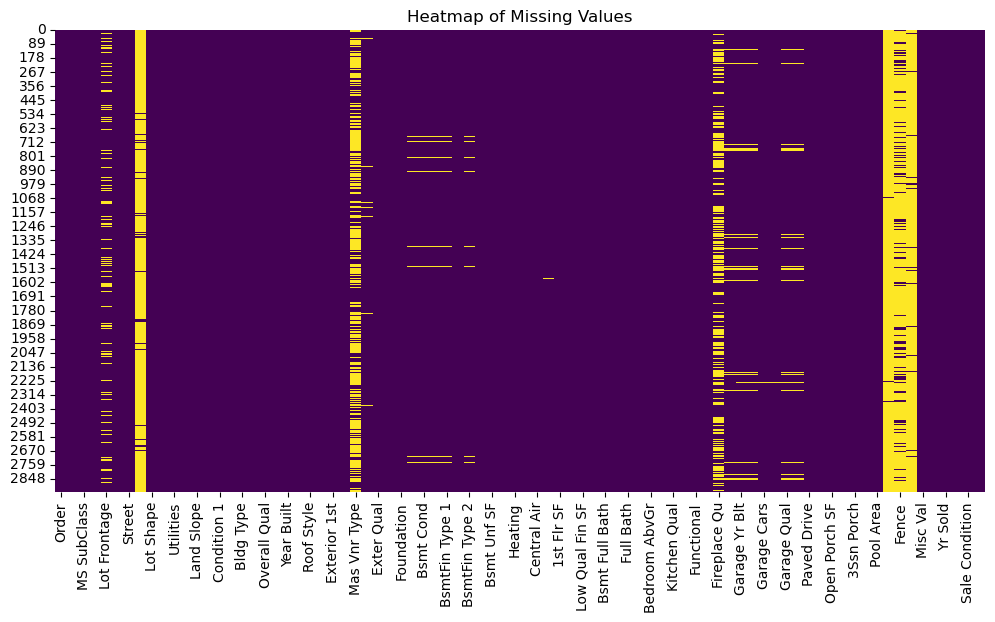

Lot Frontage 17.0  % missing values
Alley 93.0  % missing values
Mas Vnr Type 61.0  % missing values
Mas Vnr Area 1.0  % missing values
Bsmt Qual 3.0  % missing values
Bsmt Cond 3.0  % missing values
Bsmt Exposure 3.0  % missing values
BsmtFin Type 1 3.0  % missing values
BsmtFin Type 2 3.0  % missing values
Bsmt Full Bath 0.0  % missing values
Bsmt Half Bath 0.0  % missing values
Fireplace Qu 49.0  % missing values
Garage Type 5.0  % missing values
Garage Yr Blt 5.0  % missing values
Garage Finish 5.0  % missing values
Garage Qual 5.0  % missing values
Garage Cond 5.0  % missing values
Pool QC 100.0  % missing values
Fence 80.0  % missing values
Misc Feature 96.0  % missing values


In [10]:
# Identify all columns in the DataFrame `df` that have more than 1 missing (NaN) value,
# and store their names in the list `Columns_having_nan`
Columns_having_nan=[i for i in df.columns if df[i].isnull().sum()>1]
print(Columns_having_nan)

# Create a heatmap to visualize missing (NaN) values in the DataFrame `df`
# - A yellow/light cell indicates a missing value
# - A dark cell indicates a non-missing value

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

for i in Columns_having_nan:
    print(i, (np.round(df[i].isnull().mean(), 2))*100,  ' % missing values')

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)

####
### Fill the Nan values
####

In [20]:
def fill_missing_values(X_train):
    X_train = X_train.copy()

    # Fill categorical columns with 'Missing'
    cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
    X_train[cat_cols] = X_train[cat_cols].fillna('Missing')

    # Fill numerical columns with their median
    num_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']
    for col in num_cols:
        if X_train[col].isnull().any():
            median_value = X_train[col].median()
            X_train[col].fillna(median_value, inplace=True)

    return X_train

x_train_No_Nulls = fill_missing_values(x_train)
x_test_No_Nulls = fill_missing_values(x_test)

####
### Transform Temporal/ datetime variables
####

In [22]:
def transform_year_variables(df, verbose=True):
    # Identify numerical columns
    numerical_variables = [col for col in df.columns if df[col].dtypes != 'O']

    # Identify year-related columns
    year_variables = [col for col in numerical_variables if 'Yr' in col or 'Year' in col]

    if verbose:
        print("Year-related columns found:", year_variables)

    # Transform specific columns
    for col in ['Year Built', 'Year Remod/Add', 'Garage Yr Blt']:
        if col in df.columns and 'Yr Sold' in df.columns:
            df[col] = df['Yr Sold'] - df[col]
            if verbose:
                print(f"Transformed '{col}' into age since 'Yr Sold'.")

    return df

x_train_yr_transformed = transform_year_variables(x_train_No_Nulls)
x_test_yr_transformed = transform_year_variables(x_test_No_Nulls)


Year-related columns found: ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']
Transformed 'Year Built' into age since 'Yr Sold'.
Transformed 'Year Remod/Add' into age since 'Yr Sold'.
Transformed 'Garage Yr Blt' into age since 'Yr Sold'.
Year-related columns found: ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']
Transformed 'Year Built' into age since 'Yr Sold'.
Transformed 'Year Remod/Add' into age since 'Yr Sold'.
Transformed 'Garage Yr Blt' into age since 'Yr Sold'.


In [24]:
# For train data
numerical_variables_train = [col for col in x_train_yr_transformed.columns if x_train_yr_transformed[col].dtype != 'O']
year_Variables_train = [col for col in numerical_variables_train if 'Yr' in col or 'Year' in col]

discrete_variables_train = [
    i for i in numerical_variables_train 
    if len(x_train_yr_transformed[i].unique()) < 25 and i not in year_Variables_train + ['PID', 'Order']
]

continuous_variables_train = [
    i for i in numerical_variables_train 
    if i not in discrete_variables_train + year_Variables_train + ['PID', 'Order']
]

# For test data
numerical_variables_test = [col for col in x_test_yr_transformed.columns if x_test_yr_transformed[col].dtype != 'O']
year_Variables_test = [col for col in numerical_variables_test if 'Yr' in col or 'Year' in col]

discrete_variables_test = [
    i for i in numerical_variables_test
    if len(x_test_yr_transformed[i].unique()) < 25 and i not in year_Variables_test + ['PID', 'Order']
]

continuous_variables_test = [
    i for i in numerical_variables_test
    if i not in discrete_variables_test + year_Variables_test + ['PID', 'Order']
]


####
### Check the Skewness of the Data
####

In [27]:
import pandas as pd

# Assuming continuous_variables is defined and contains continuous column names in x_train

# Create a DataFrame with summary stats for continuous features
feature_stats = pd.DataFrame({
    'Feature': continuous_variables_train,
    'Mean': [x_train[feat].mean() for feat in continuous_variables_train],
    'StdDev': [x_train[feat].std() for feat in continuous_variables_train],
    'Min': [x_train[feat].min() for feat in continuous_variables_train],
    'Max': [x_train[feat].max() for feat in continuous_variables_train],
    'Skew': [x_train[feat].skew() for feat in continuous_variables_train]
})

# Round values for neat display
feature_stats = feature_stats.round(2)

# Sort by skewness descending (most skewed on top)
feature_stats = feature_stats.sort_values(by='Skew', ascending=False)

display(feature_stats)


,Feature,Mean,StdDev,Min,Max,Skew
17,Misc Val,53.51,593.09,0.0,17000.0,21.23
1,Lot Area,10194.27,8131.82,1470.0,215245.0,12.87
15,3Ssn Porch,2.39,24.24,0.0,508.0,12.05
9,Low Qual Fin SF,4.99,48.23,0.0,1064.0,11.75
4,BsmtFin SF 2,50.37,170.31,0.0,1526.0,4.07
14,Enclosed Porch,22.68,62.99,0.0,1012.0,4.07
16,Screen Porch,16.56,57.46,0.0,576.0,3.92
2,Mas Vnr Area,101.42,178.31,0.0,1600.0,2.62
13,Open Porch SF,47.16,67.21,0.0,742.0,2.60
12,Wood Deck SF,93.08,126.70,0.0,1424.0,1.89


### Feature Scaling

####
### Log Normalization and standardization
####

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def transform_features(df, verbose=True):
    log_features = [
        'Misc Val', 'Lot Area', '3Ssn Porch', 'Low Qual Fin SF', 'BsmtFin SF 2',
        'Enclosed Porch', 'Screen Porch', 'Mas Vnr Area', 'Open Porch SF',
        'Wood Deck SF', 'Lot Frontage', 'SalePrice', '1st Flr SF', 
        'BsmtFin SF 1', 'Gr Liv Area', 'Total Bsmt SF'
    ]

    standardize_features = ['Bsmt Unf SF', '2nd Flr SF', 'Garage Area']
    
    # Check which features exist in the DataFrame to avoid errors
    log_feats_present = [f for f in log_features if f in df.columns]
    std_feats_present = [f for f in standardize_features if f in df.columns]
    
    if verbose:
        print(f"Applying log1p transform on: {log_feats_present}")
        print(f"Applying standardization on: {std_feats_present}")

    # Log transform
    for feature in log_feats_present:
        df[feature] = np.log1p(df[feature])

    # Standardize continuous features
    if std_feats_present:
        scaler = StandardScaler()
        df[std_feats_present] = scaler.fit_transform(df[std_feats_present])
    
    # Standardize discrete variables if defined and present
    if 'discrete_variables' in globals():
        discrete_vars_present = [f for f in discrete_variables if f in df.columns]
        if discrete_vars_present:
            if verbose:
                print(f"Standardizing discrete variables: {discrete_vars_present}")
            scaler = StandardScaler()
            df[discrete_vars_present] = scaler.fit_transform(df[discrete_vars_present])
    
    return df

x_train_num_scaled = transform_features(x_train_yr_transformed)
x_test_num_scaled = transform_features(x_test_yr_transformed)

Applying log1p transform on: ['Misc Val', 'Lot Area', '3Ssn Porch', 'Low Qual Fin SF', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'SalePrice', '1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Total Bsmt SF']
Applying standardization on: ['Bsmt Unf SF', '2nd Flr SF', 'Garage Area']
Applying log1p transform on: ['Misc Val', 'Lot Area', '3Ssn Porch', 'Low Qual Fin SF', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'SalePrice', '1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Total Bsmt SF']
Applying standardization on: ['Bsmt Unf SF', '2nd Flr SF', 'Garage Area']


####
### Label Encoding and flagging rare values
####

In [34]:

def encode_rare_and_label_encode(df, target_col='SalePrice', rare_thresh=0.01, verbose=True):
    # Identify categorical variables
    categorical_variables = [col for col in df.columns if df[col].dtype == 'O']
    
    for col in categorical_variables:
        # Calculate category frequencies
        freqs = df[col].value_counts(normalize=True)
        # Categories with frequency > threshold
        common_cats = freqs[freqs > rare_thresh].index
        
        # Replace rare categories with 'Rare_var'
        df[col] = np.where(df[col].isin(common_cats), df[col], 'Rare_var')

    for col in categorical_variables:
        # Order categories by mean target value
        ordered_labels = df.groupby(col)[target_col].mean().sort_values().index
        label_map = {k: i for i, k in enumerate(ordered_labels)}
        
        # Map labels to integers
        df[col] = df[col].map(label_map)
        

    return df
x_train_cat_scaled = encode_rare_and_label_encode(x_train_num_scaled)
x_test_cat_scaled = encode_rare_and_label_encode(x_test_num_scaled)

In [36]:
x_train_cat_scaled.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2624,2625,535454030,90,2,4.110874,9.053102,1,1,0,1,...,0,0,4,2,0.0,12,2006,2,3,11.307143
692,693,902102080,50,1,4.110874,9.253496,1,0,0,1,...,0,0,2,2,0.0,5,2009,2,3,11.608245
2741,2742,905452140,50,2,4.330733,9.161780,1,1,0,1,...,0,0,4,2,0.0,10,2006,2,3,11.827013
879,880,907410130,20,2,4.454347,9.230241,1,1,0,1,...,0,0,4,2,0.0,1,2009,2,3,12.588614
1673,1674,527427160,120,0,3.526361,8.322151,1,1,1,1,...,0,0,4,2,0.0,7,2007,2,3,11.951187


####
### Preparing Feature Set: Removing Irrelevant Columns, Correlation Analysis, and Data Splitting
####

In [53]:
# Copy the features and append the target
x_train_temp = x_train_cat_scaled.copy()
x_train_temp['SalePrice'] = y_train.loc[x_train.index]

# Compute correlation of each feature with SalePrice
corr = x_train_temp.corr()['SalePrice'].drop('SalePrice')

# Sort to inspect if needed
print(corr.sort_values(ascending=False))

Overall Qual      0.801250
Neighborhood      0.710454
Exter Qual        0.697330
Gr Liv Area       0.689706
Bsmt Qual         0.649054
                    ...   
Kitchen AbvGr    -0.117883
Enclosed Porch   -0.199429
Garage Yr Blt    -0.511520
Year Remod/Add   -0.530432
Year Built       -0.561496
Name: SalePrice, Length: 79, dtype: float64


In [55]:
# Set threshold
threshold = 0.05

# Keep only features with correlation > threshold (positive or negative)
selected_corr_features = corr[abs(corr) > threshold].index.tolist()

print(f"Selected {len(selected_corr_features)} features based on correlation > {threshold}")


Selected 71 features based on correlation > 0.05


In [57]:
# Final training and testing feature sets with only selected features
X_final = x_train_cat_scaled[selected_corr_features].copy()
x_test_filtered = x_test_cat_scaled[selected_corr_features].copy()

# Target variable
y_final = y_train.loc[x_train.index]


In [59]:
# Ensure test set has same columns (just in case)
missing_cols = set(X_final.columns) - set(x_test_filtered.columns)
for col in missing_cols:
    x_test_filtered[col] = 0  # Add missing columns as zeros

x_test_filtered = x_test_filtered[X_final.columns]  # Reorder columns to match


####
### Linear Regression: Final Model Training and Test Set Performance Metrics
####

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train model
final_model = LinearRegression()
final_model.fit(X_final, y_final)

# Predict on test set
y_test_pred = final_model.predict(x_test_filtered)

# Evaluate performance
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))


Test RMSE: 33129.45897443803
Test R^2 Score: 0.8244622964524925


####
### Model Evaluation: Actual vs Predicted and Residuals Plot
####

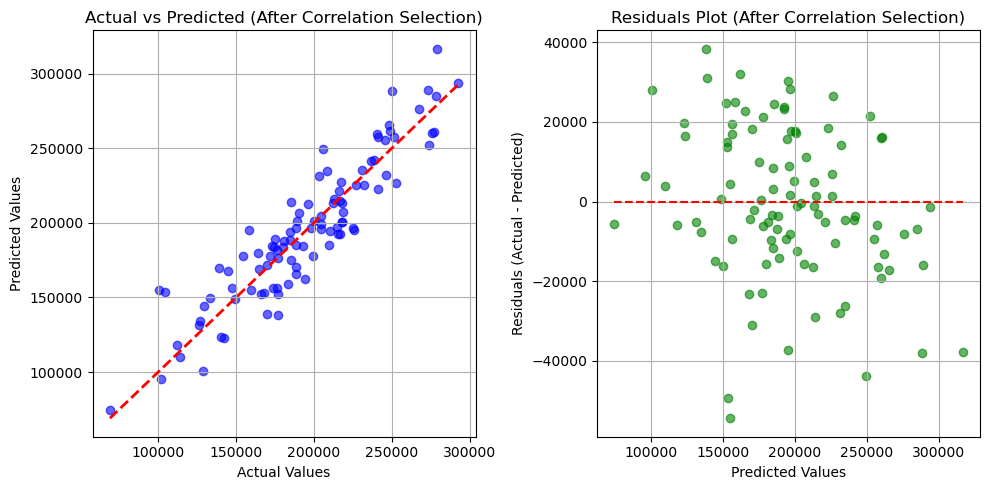

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated: Actual vs Predicted after correlation-based feature selection
np.random.seed(42)
y_test = np.random.normal(200000, 50000, 100)
y_test_pred_corr = y_test + np.random.normal(0, 20000, 100)  # slightly better predictions after feature selection

# Plotting
plt.figure(figsize=(10, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_corr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Correlation Selection)")
plt.grid(True)

# Residuals plot
plt.subplot(1, 2, 2)
residuals_corr = y_test - y_test_pred_corr
plt.scatter(y_test_pred_corr, residuals_corr, alpha=0.6, color='green')
plt.hlines(y=0, xmin=y_test_pred_corr.min(), xmax=y_test_pred_corr.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot (After Correlation Selection)")
plt.grid(True)

plt.tight_layout()
plt.show()
